In [1]:
from dependence import ImpactOfDependence
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
dim = 4
threshold = 2.
K = 250
n = 10000
measure = "KendallTau"
margins = [ot.Normal()]*dim
families = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    for j in range(i):
        families[i, j] = 1

In [3]:
def non_linear_function(x):
    """
    """
    if x.shape[0] == x.size:
        id_ax = None
        x0 = x[0]
        x1 = x[1]
    else:
        id_ax = 1
        x0 = x[:, 0]
        x1 = x[:, 1]
    return -(np.cos(x*np.pi)**3).sum(axis=id_ax) + (np.sin(x*np.pi/4)**3).sum(axis=id_ax)
#     return np.cos(x0) + x1

if dim == 2:
    n_sample = 200
    xmin, xmax = -4., 4.
    x = np.linspace(xmin, xmax, n_sample)
    y = x
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n_sample, n_sample))

    for i in range(n_sample):
        for j in range(n_sample):
            Z[i, j] = non_linear_function(np.asarray([x[i], y[j]]))

    fig, ax = plt.subplots(figsize=(8, 6))
    inputs = np.vstack([X, Y]).reshape(dim,-1).T

    plt.pcolor(X, Y, Z, cmap="jet")
    plt.colorbar()  
    fig.tight_layout()

In [4]:
n_alpha = 50
alphas = np.linspace(0., 1., n_alpha+1, endpoint=False)[1:]

In [5]:
impact = ImpactOfDependence(model_func=non_linear_function, margins=margins, families=families)

impact.run_independence(n)
res_quant_indep = impact.compute_quantiles(alphas)
impact.run(K, n)

In [6]:
res_quant = impact.compute_quantiles(alphas)

id_min = res_quant.quantity.argmin()
if dim == 2:
    quant_res.draw()

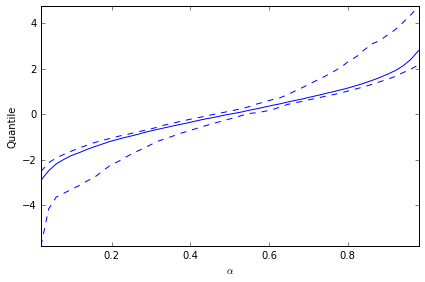

In [7]:
res_quant.draw_bounds(res_quant_indep)

## Frechet Hoefding

In [8]:
impact.minmax_run(n)
res_quant_FH = impact.compute_quantiles(alphas)

In [9]:
min_quant = res_quant.quantity.min(axis=1)
max_quant = res_quant.quantity.max(axis=1)

min_quant_FH = res_quant_FH.quantity.min(axis=1)
max_quant_FH = res_quant_FH.quantity.max(axis=1)

indep_quant = res_quant_indep.quantity

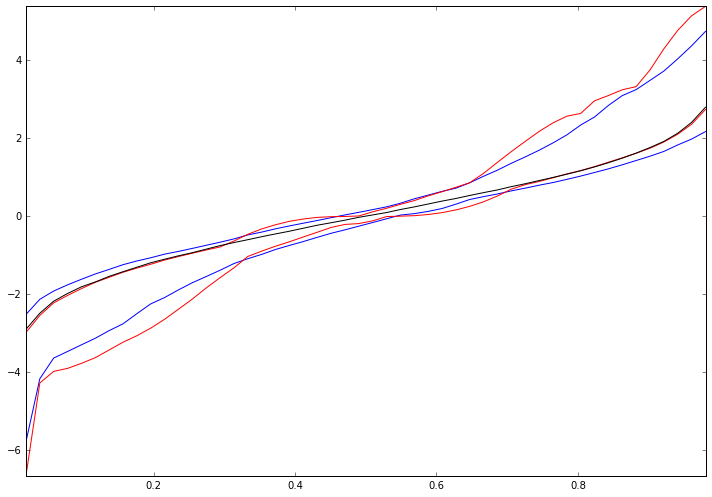

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(alphas, min_quant, 'b-', linewidth=1)
ax.plot(alphas, max_quant, 'b-', linewidth=1)
ax.plot(alphas, min_quant_FH, 'r-', linewidth=1)
ax.plot(alphas, max_quant_FH, 'r-', linewidth=1)
ax.plot(alphas, indep_quant, 'k-', linewidth=1)
ax.axis('tight')
fig.tight_layout()

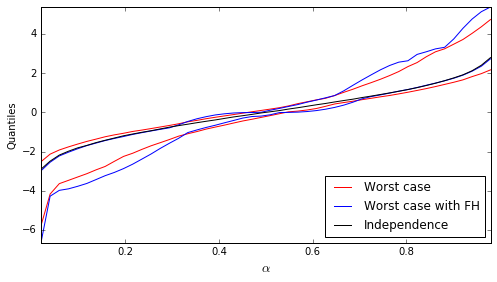

In [14]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(alphas, min_quant, 'r-', linewidth=1, label='Worst case')
ax.plot(alphas, max_quant, 'r-', linewidth=1)
ax.plot(alphas, min_quant_FH, 'b-', linewidth=1, label='Worst case with FH')
ax.plot(alphas, max_quant_FH, 'b-', linewidth=1)
ax.plot(alphas, indep_quant, 'k-', linewidth=1, label='Independence')
ax.set_ylabel('Quantiles')
ax.set_xlabel('$\\alpha$', fontsize=13)
ax.axis('tight')
ax.legend(loc=4)
fig.tight_layout()
fig.savefig('./figures/quantile_bounds_non_linear.pdf')